# U.S. Medical Insurance Costs

This report is an attempt of U.S. Medical Insurance Costs visual data analysis using python. <br>

First, we need to import the neccessary libraries in order to inspect and analyze the data. The libraries that this code will require are: pandas, seaborn and matplotlib.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, we create a python variable to read the given csv file as a dataframe object and print some general information about the dataset.

In [3]:
df=pd.read_csv('insurance.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


As we can see, the dataset contains 1338 rows- data (with no missing data) and 7 variables: <br>
    1. Age (integer - descrete variable) <br>
    2. Sex (categorical - binary variable) <br>
    3. bmi (float - continuous variable) <br>
    4. children (integer - discrete variable) <br>
    5. smoker (categorical - binary variable) <br>
    6. Region (categorical variable) <br>
    7. Charges (in US $, float - continuous variable) <br>
<br>
Using the .describe method on the dataframe, we see some general information about the descriptive - summary statistics of the variables.
Age has a range from 18 to 64 years with an average of 39 years and standard deviation of 14 years 
BMI ranges from 15.96 [kg/m^2] to 53.13 [kg/m^2] <br> Children is a discrete variable with a range of 0 to 5. The mean value of this variable is 1 (rounded since there is no point in saying 1.2 children), with a deviation of 1.2 (around 1). <br> Lastly, the charges variable have a mean of 13270 dollars, and a deviation of arround 12110 dollars.

Using the seaborn library along with matplotlib, we will try to visualize the data in order to get a general understanding of it.

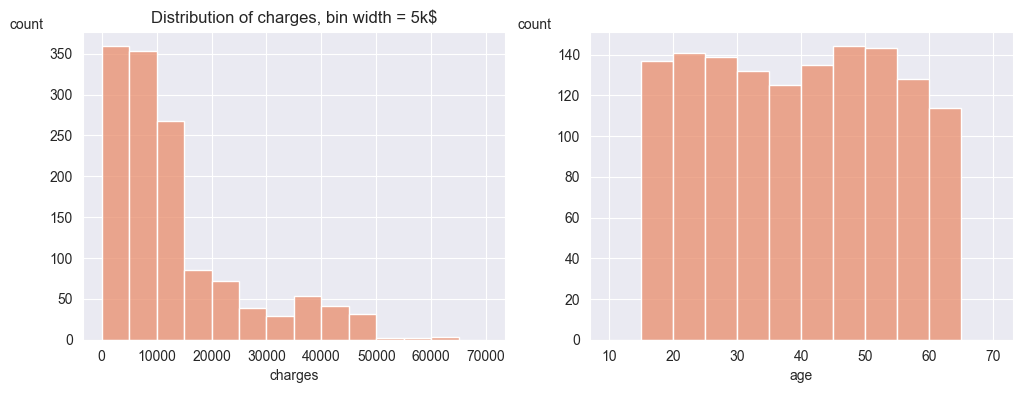

In [12]:
#Style configuration
sns.set_style('darkgrid')
sns.set_palette('flare')

#Figure object creation
fig,ax=plt.subplots(1,2,figsize=(12,4))

#Filling the subplots with data
sns.histplot(df,x='charges',binrange=(0,70000),bins=14,ax=ax[0]).set_title('Distribution of charges, bin width = 5k$')
sns.histplot(df,x='age',ax=ax[1],binrange=(10,70),bins=12)

#Placing y axis label as the count since we are plotting a histplot
ax[0].set_ylabel('count',rotation=0,loc='top')
ax[1].set_ylabel('count',rotation=0,loc='top')

plt.show()

It is clear from the first histogram that most of the people are charged with below 15 thousand dollars while as the charges increase, the fewer the people are that are charged with these higher amounts.<br>

The second histogram shows that the data is fairly balanced in terms of age.

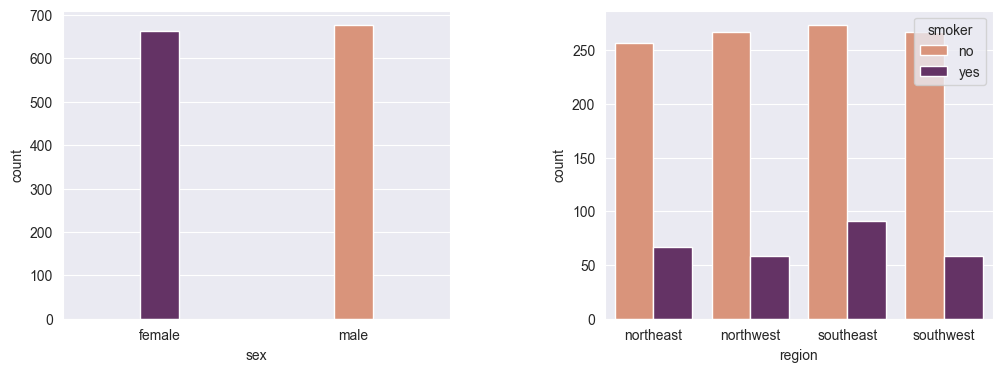

In [5]:
#Setting up the next set of subplots
fig,ax=plt.subplots(1,2,figsize=(12,4))
#Adjusting the width between the subplots
plt.subplots_adjust(wspace=0.4)

#creating the top left subplot
sns.barplot(df.groupby(['sex']).size().reset_index(name='count'),x='sex',y='count',hue='sex',
            width=0.2,palette=[sns.color_palette('flare').as_hex()[5],sns.color_palette('flare').as_hex()[0]],ax=ax[0])

#creating the top right subplot
sns.barplot(df.groupby(['region','smoker']).size().reset_index(name='count'),x='region',y='count',hue='smoker',ax=ax[1],
            palette=[sns.color_palette("flare").as_hex()[0],sns.color_palette("flare").as_hex()[5]])

plt.show()



As we can see from the first figure the dataset is balanced between males and females. The second figure shows the number of smokers per region. It is clear that the dataset overall contains more non smokers than smokers, and is also balanced in terms of region. Meaning that there are almost equal number of data aqcuired from all the regions. 

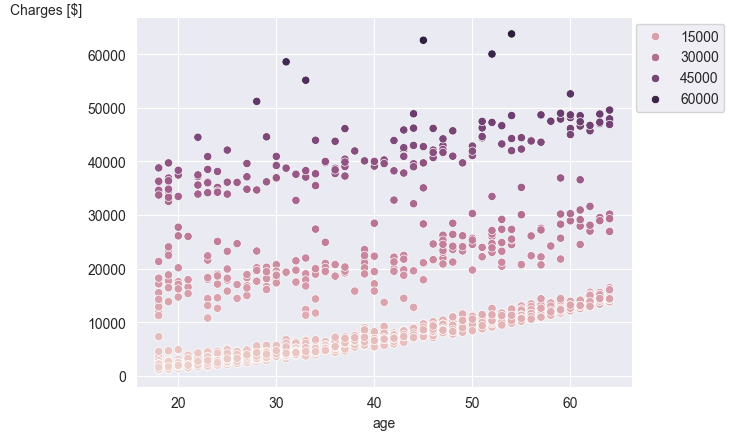

In [6]:
#Plotting the age variable against the charges variable
sns.scatterplot(df[['age','charges']],x='age',
                y='charges',hue='charges')
#Setting up the y axis label
plt.ylabel(ylabel='Charges [$]',rotation=0,loc='top')
#Moving the legend outside the plot
plt.legend(bbox_to_anchor=(1.2,1))

plt.show()

The figure above reveals an interesting underlying three layered pattern that arises by another variable within the dataset. This figure also reveals a positive correlation between age and charges, meaning that the higher the age , the higher the charges. This correlation applies to all three layers of the pattern.<br> <br> In order to uncover which variable enables the formation of the pattern showed above, we create the same plot using a hue='smoker' parameter on the seaborn.scatterplot object, in order for the data points to appear with distinguishable colors depending on wether they are smokers or not, instead of data point color determined by the charge variable.

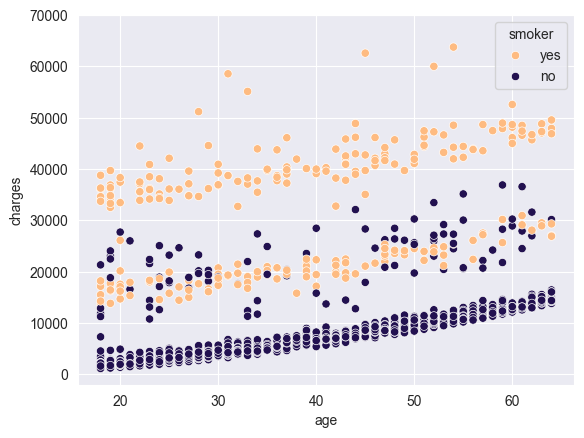

In [7]:
#Plotting the age variable against the charges variable
sns.scatterplot(df,x='age',y='charges',hue='smoker',palette=[sns.color_palette('magma').as_hex()[5],
                                                             sns.color_palette('magma').as_hex()[0]])
#Setting y axis ticks
plt.yticks([0,10000,20000,30000,40000,50000,60000,70000])
#Showing the plot
plt.show()

It is clear from the above plot that smoking significally affects the overall charges that will be applied to an individual along with the age variable. More specifically, smoking will increase the charges variable and although there are exceptions for the individuals of the non smoking category, their charges do not go above a certain amount.

For further investigation of this three layered pattern, we create more graphs by changing some variables and applying conditions to the dataset

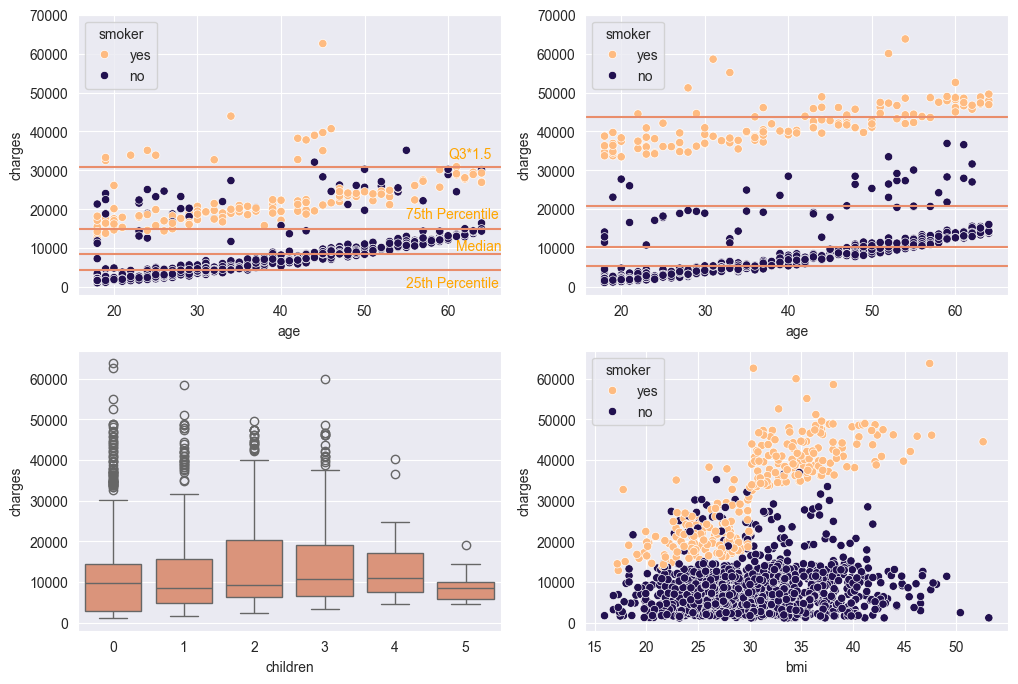

In [8]:
#Creating subsets of the data based on their bmi value and comparing it to the dataset's average    
df_above_average_bmi=df[df['bmi']>df['bmi'].mean()]
df_below_average_bmi=df[df['bmi']<df['bmi'].mean()]

#Creating the subplots 
fig,ax=plt.subplots(2,2,figsize=(12,8))
palette={'no':sns.color_palette('magma').as_hex()[0],'yes':sns.color_palette('magma').as_hex()[5]}
hue_order=['yes','no']

#plotting the first row of graphs, which contain individuals which are above or below average bmi, distinguished by wether they are smokers or not
sns.scatterplot(df_below_average_bmi,x='age',y='charges',hue='smoker',palette=palette,ax=ax[0,0],hue_order=hue_order)
sns.scatterplot(df_above_average_bmi,x='age',y='charges',hue='smoker',palette=palette,ax=ax[0,1],hue_order=hue_order)

#creating the second row of plots which are a boxplot which contains 5 different box plots for each number of children of the individuals with respect to charges
#and the second scatterplot is charges plotted against bmi value
sns.boxplot(df,x='children',y='charges',ax=ax[1,0])
sns.scatterplot(df,x='bmi',y='charges',hue='smoker',ax=ax[1,1],palette=palette,hue_order=hue_order)

#Storing the interquantile range in a python variable
iqr_below_average=df_below_average_bmi['charges'].quantile(0.75)-df_below_average_bmi['charges'].quantile(0.25)

#Setting up more graph information
ax[0,0].set_yticks([0,10000,20000,30000,40000,50000,60000,70000])
ax[0,0].legend(loc='upper left').set_title('smoker')

ax[0,0].axhline(df_below_average_bmi['charges'].median())
ax[0,0].axhline(df_below_average_bmi['charges'].quantile(0.25))
ax[0,0].axhline(df_below_average_bmi['charges'].quantile(0.75))
ax[0,0].axhline(df_below_average_bmi['charges'].quantile(0.75)+iqr_below_average*1.5)

ax[0,0].text(x=61,color='orange',y=df_below_average_bmi['charges'].median(),s='Median',va='bottom')
ax[0,0].text(x=60,color='orange',y=df_below_average_bmi['charges'].quantile(0.75)+21000,s='Q3*1.5',va='top')
ax[0,0].text(x=55,color='orange',y=df_below_average_bmi['charges'].quantile(0.25)-1500,s='25th Percentile',va='top')
ax[0,0].text(x=55,color='orange',y=df_below_average_bmi['charges'].quantile(0.75)+2000,s='75th Percentile',va='bottom')



iqr_above_average=df_above_average_bmi['charges'].quantile(0.75)-df_above_average_bmi['charges'].quantile(0.25)

ax[0,1].set_yticks([0,10000,20000,30000,40000,50000,60000,70000])

ax[0,1].axhline(df_above_average_bmi['charges'].median())
ax[0,1].axhline(df_above_average_bmi['charges'].quantile(0.25))
ax[0,1].axhline(df_above_average_bmi['charges'].quantile(0.75))
ax[0,1].axhline(df_above_average_bmi['charges'].quantile(0.75)+iqr_above_average*1.5)


plt.show()


The first plot (upper left) is made by a subset of data of individuals that have lower than average bmi, and the one on the top right is created by a subset of the data of individuals that have more than average bmi. From these two plots, we can safely assume that bmi that is higher than the average body mass index has an effect on the charges only on the smoker category. At the same time, regardless of the bmi value, the scale of the charges can be distinguished by the smoker category. <br><br> Regarding the lower pair of the graphs, the first plot (bottom left) shows the interquantile ranges of the charges based on the number of children and the bottom right plot shows the charges based on bmi but color coded by the smoker category. With a quick look, it can be seen that most outliers of charges are within the subset of data with zero, one, two and three children, and the max value of charges is within the zero children subset. <br><br> The category with the least variability seems to be the five children category both inside the IQR range and outside of it, although the median value is more towards the upper limit of IQR meaning below the 50th percentile within this box there is higher variability. <br><br> The box with the highest variability both in terms of IQR and the values below 1.5*IQR seems to be the one that represents two children. Within this box there the charges are closer to eachother below the 50th percentile, while huge variability appears above the value. <br><br> The bottom right plot reveals a pattern regarding the bmi value and the charges only for the people that are smokers. There seems to be a light positive correlation and around 30 bmi, charges variable seems to have a "jump - like" increase with the positive correlation remaining, only from this point onward it seems to have a somewhat higher slope. Therefore this plot further establishes the idea that bmi affects only charges of the people that are smokers

In order to quantify the positive correlations on age and bmi variables with respect to the charges variable, Pearsons r is used along with the p value for the rejection or not of the null hypothesis (wether these variables are randomly correlated or there's an actual correlation that is not by chance). To do so, we include scipy.stats library in our current code

In [9]:
import scipy.stats as sc

print('The correlation coefficient for the subset of individuals that are above the \naverage bmi is {} and the p value is {}.'
.format(sc.pearsonr(df_above_average_bmi['age'],y=df_above_average_bmi['charges'])[0],sc.pearsonr(df_above_average_bmi['age'],y=df_above_average_bmi['charges'])[1]))

print('\nThe correlation coefficient for the subset of individuals that are below the \naverage bmi is {} and the p value is {}.'
.format(sc.pearsonr(df_below_average_bmi['age'],y=df_below_average_bmi['charges'])[0],sc.pearsonr(df_below_average_bmi['age'],y=df_below_average_bmi['charges'])[1]))


The correlation coefficient for the subset of individuals that are above the 
average bmi is 0.22708142845712 and the p value is 5.31925339625545e-09.

The correlation coefficient for the subset of individuals that are below the 
average bmi is 0.405705842016214 and the p value is 8.416025442822181e-29.


Therefore, even without cleaning the data from the outliers, there's a light positive correlation with a p value lower than 0.01, which means age is not correlated by chance with the charges. The same applies for the coefficient of the subset that includes only the individuals that are below average bmi. If we split these subsets even more based on the smoker category, it is expected that the correlation coefficient would be much higher. This is done by the code on the next cell.

In [10]:
smokers_above_average=df_above_average_bmi[df_above_average_bmi['smoker']=='yes']
non_smokers_above_average=df_above_average_bmi[df_above_average_bmi['smoker']=='no']

smokers_below_average=df_below_average_bmi[df_below_average_bmi['smoker']=='yes']
non_smokers_below_average=df_below_average_bmi[df_below_average_bmi['smoker']=='no']

print('The correlation coefficient between age and charges variables for smokers who are \nabove average bmi is {} with a p value of {}'
      .format(sc.pearsonr(smokers_above_average['age'],smokers_above_average['charges'])[0],
              sc.pearsonr(smokers_above_average['age'],smokers_above_average['charges'])[1]))

print('\nThe correlation coefficient between age and charges variables for non smokers who are \nabove average bmi is {} with a p value of {}'
      .format(sc.pearsonr(non_smokers_above_average['age'],non_smokers_above_average['charges'])[0],
              sc.pearsonr(non_smokers_above_average['age'],non_smokers_above_average['charges'])[1]))

print('\nThe correlation coefficient between age and charges variables for smokers who are \nbelow average bmi is {} with a p value of {}'
      .format(sc.pearsonr(smokers_below_average['age'],smokers_below_average['charges'])[0],
              sc.pearsonr(smokers_below_average['age'],smokers_below_average['charges'])[1]))

print('\nThe correlation coefficient between age and charges variables for non smokers who are \nbelow average bmi is {} with a p value of {}'
      .format(sc.pearsonr(non_smokers_below_average['age'],non_smokers_below_average['charges'])[0],
              sc.pearsonr(non_smokers_below_average['age'],non_smokers_below_average['charges'])[1]))



The correlation coefficient between age and charges variables for smokers who are 
above average bmi is 0.7132460857599103 with a p value of 2.859499063087286e-22

The correlation coefficient between age and charges variables for non smokers who are 
above average bmi is 0.6441766635537496 with a p value of 3.0635340261963302e-61

The correlation coefficient between age and charges variables for smokers who are 
below average bmi is 0.4551052668656374 with a p value of 1.8159968218485592e-08

The correlation coefficient between age and charges variables for non smokers who are 
below average bmi is 0.6055232180141097 with a p value of 1.2559417090038577e-56


As expected, the correlation coefficient is much higher while the p value remains pretty low, which means these variables are not by chance correlated. Next, we do the same check for the variables of bmi with charges on both smokers and non smokers seperately.

In [11]:
bmi_non_smokers_subset=df[df['smoker']=='no']
bmi_smokers_subset=df[df['smoker']=='yes']

print('The correlation coefficient between bmi variable and charges of non \nsmokers category is {} with a p value of {}.'
      .format(sc.pearsonr(bmi_non_smokers_subset['bmi'],bmi_non_smokers_subset['charges'])[0],
              sc.pearsonr(bmi_non_smokers_subset['bmi'],bmi_non_smokers_subset['charges'])[1]))


print('\nWhile correlation coefficient between bmi variable and charges of \nsmokers category is {} with a p value of {}.'
      .format(sc.pearsonr(bmi_smokers_subset['bmi'],bmi_smokers_subset['charges'])[0],
              sc.pearsonr(bmi_smokers_subset['bmi'],bmi_smokers_subset['charges'])[1]))

The correlation coefficient between bmi variable and charges of non 
smokers category is 0.08403654312833268 with a p value of 0.006091408541837675.

While correlation coefficient between bmi variable and charges of 
smokers category is 0.8064806070155405 with a p value of 5.019668631795105e-64.


The bmi variable of non smoker category seems to have a near zero correlation coefficient with charges, which means this variable is not linearly correlated with charges. On the contrary, bmi variable on the smoker category seems to be strongly linearly correlated with charges, with a pretty low p value, which means the null hypothesis can be rejected.

In conclussion, this dataset is balanced in terms of sex, terittory and age, while there are more non smokers than smokers included in the dataset. A visual analysis of the variables revealed that, the variables that have a noticable impact on insurance charges are : <br> - Age <br> - Body mass index <br> - Smoking <br> The effect that these variables have on insurance charges are different. For example, charges are linearly correlated with age. Smoking seems to have a scaling effect on the charges variable and lastly, BMI affects charges only for individuals within the smoking category while having a positive correlation with the charges variable. One last note, these variables are not the only measures that could affect insurance charges, and the conclussions that are drawn from this dataset cannot be generalized to other datasets that include the same set of variables but differ in terms of values.